    index abbreviation   ages  year  population                 state  \
8       8           DC  total  2010    605125.0  District of Columbia   
6       6           CT  total  2010   3579210.0           Connecticut   
7       7           DE  total  2010    899711.0              Delaware   
9       9           FL  total  2010  18846054.0               Florida   
4       4           CA  total  2010  37333601.0            California   
10     10           GA  total  2010   9713248.0               Georgia   
2       2           AZ  total  2010   6408790.0               Arizona   
3       3           AR  total  2010   2922280.0              Arkansas   
5       5           CO  total  2010   5048196.0              Colorado   
1       1           AK  total  2010    713868.0                Alaska   

    area (sq. mi)  pop density  
8              68  8898.897059  
6            5544   645.600649  
7            1954   460.445752  
9           65758   286.597129  
4          163707   228.051342 

<AxesSubplot:xlabel='state'>

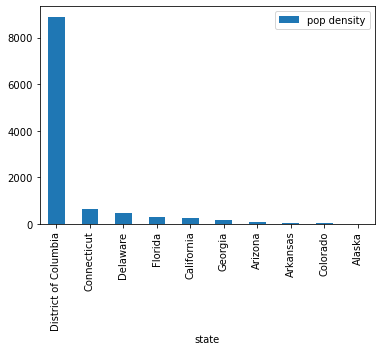

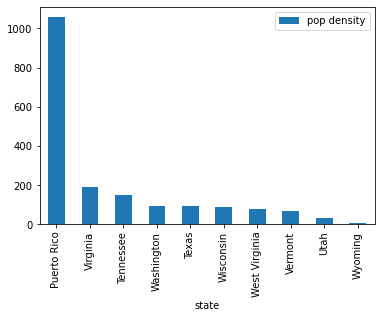

In [47]:
import pandas as pd
import os; os.system('clear')
import matplotlib.pyplot as plt

pop = pd.read_csv('state-population2.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
# abbrevs.loc[len(abbrevs.index)] = ['Puerto Rico', 'PR']

#merging
merge1 = pd.merge(areas, abbrevs, on="state")
pop = pop.rename(columns={'state/region': 'abbreviation'})
pop = pop[pop['ages'] != 'under18']
pop = pop[pop['year'] == 2010]
# print(pop)
merge = pd.merge(pop, merge1, on='abbreviation')
merge.reset_index(level=0, inplace = True)
merge['pop density'] = merge['population'] / merge['area (sq. mi)']
merge = merge.sort_values(by = 'pop density', ascending = False)
top10 = merge.drop(range(10,52))
# top10.reset_index(level=0, inplace = True)
top10 = top10.drop(0)
bottom10 = merge.drop(range(0,42))
print(top10)
# print(bottom10)

top10.plot.bar(x = 'state', y = 'pop density')
bottom10.plot.bar(x = 'state', y = 'pop density')